# Taller 2: operaciones de transformación del histograma

## Cargue la imagen de trabajo y visualícela.

In [10]:
# Modificar ruta de las imágenes
PATH = './imagenes/'

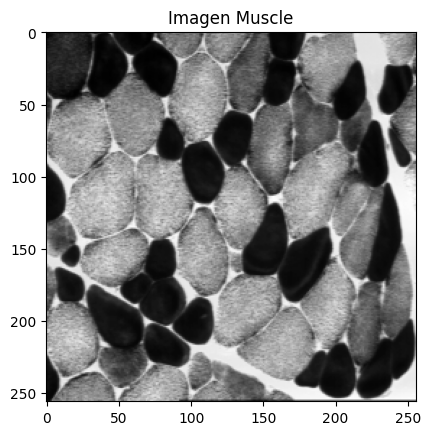

In [11]:
import cv2
import matplotlib.pyplot as plt

imagen = cv2.imread(PATH + 'MUSCLE.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Muscle')
plt.show()

## Visualice su histograma y escoja un valor S de nivel de gris que permita separar aproximadamente las fibras oscuras del resto de la imagen. ¿Cuál es este valor?

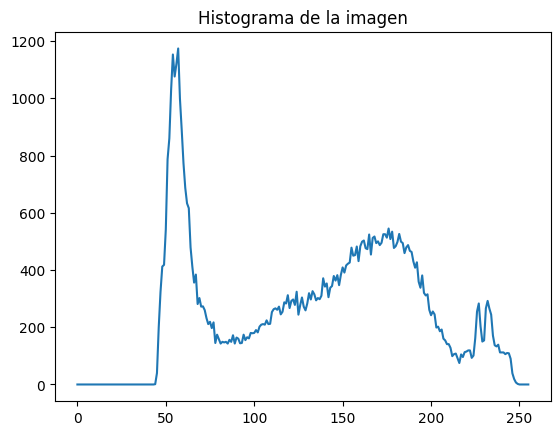

In [12]:
hist = cv2.calcHist([imagen], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title('Histograma de la imagen')
plt.show()

Observando el hisgrama, las fibras oscuras corresponden al pico alrededor de 70. Podemos intentar con varios valores, como 70, 75 y 80.

## Efectúe una calibración del histograma (ver primer punto de este taller) entre los valores S y S +1 de la imagen. Visualice la imagen resultado y su histograma. ¿Cuál es su conclusión?

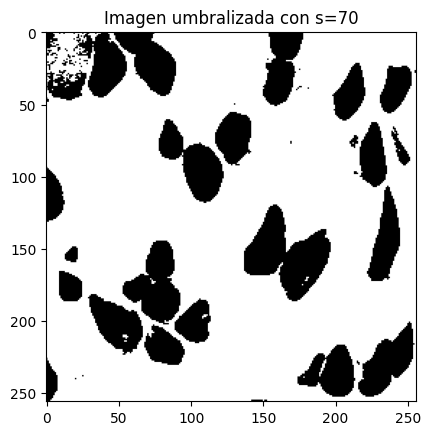

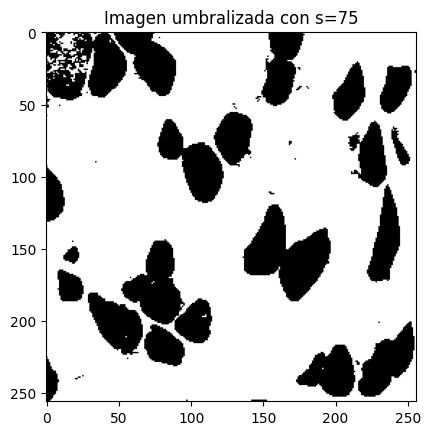

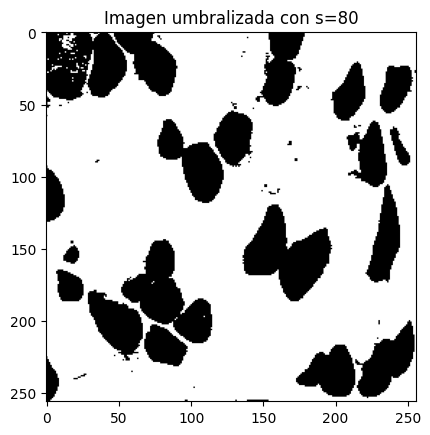

In [13]:
from skimage import exposure

def reescalar_umbralizacion(imagen, s):
    return exposure.rescale_intensity(imagen, in_range=(s, s+1), out_range=(0,255))

umbrales = [70, 75, 80]

for s in umbrales:
    img_umbralizada = reescalar_umbralizacion(imagen, s)
    plt.imshow(img_umbralizada, cmap='gray')
    plt.title(f'Imagen umbralizada con s={s}')
    plt.show()

Obtenemos el mejor resultado con el umbral de 80. Ahora comparamos la imagen con umbral vs la original.

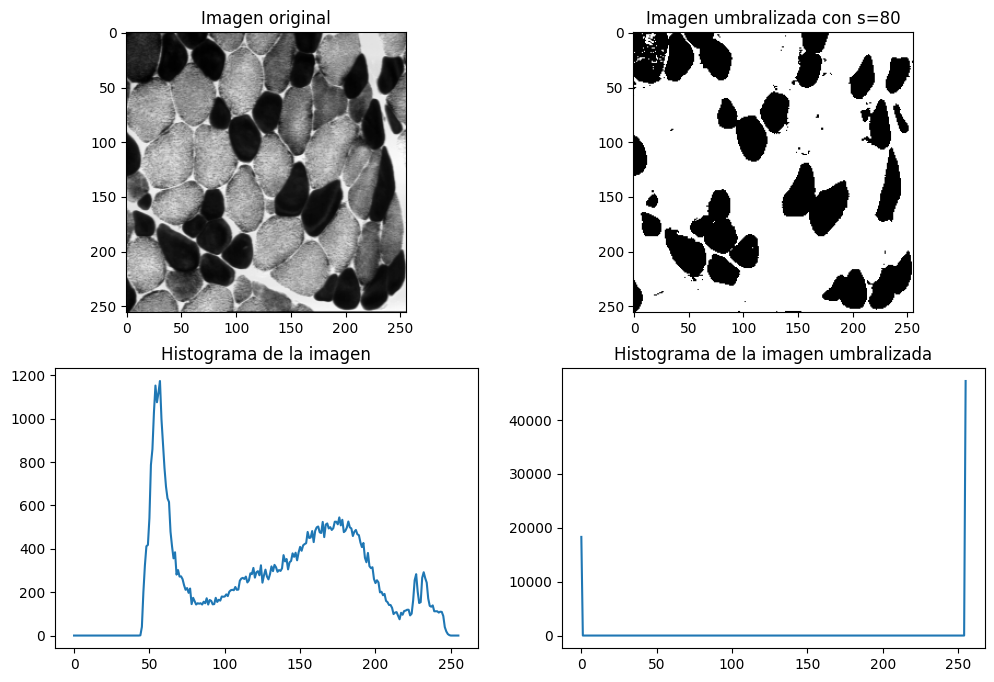

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].imshow(imagen, cmap='gray')
axs[0, 0].set_title('Imagen original')
axs[0, 1].imshow(reescalar_umbralizacion(imagen, 80), cmap='gray')
axs[0, 1].set_title('Imagen umbralizada con s=80')
axs[1, 0].plot(hist)
axs[1, 0].set_title('Histograma de la imagen')
axs[1, 1].plot(cv2.calcHist([reescalar_umbralizacion(imagen, 80).astype('uint8')], [0], None, [256], [0, 256]))
axs[1, 1].set_title('Histograma de la imagen umbralizada')
plt.show()

La conclusión es que al reescalar la imagen usando valores $S$ y $S+1$ estamos aplicando una máscara binaria que envia todos los valores por debajo de $S$ a 0 y por encima de $S+1$ a 255, dejando solo dos intensidades en la imagen y separando regiones de la imagen.

## Repita la misma operación utilizando el módulo de umbralización simple, con el umbral S. ¿Conclusión?

Utilizamos el módulo de `threshold` de `cv2`.

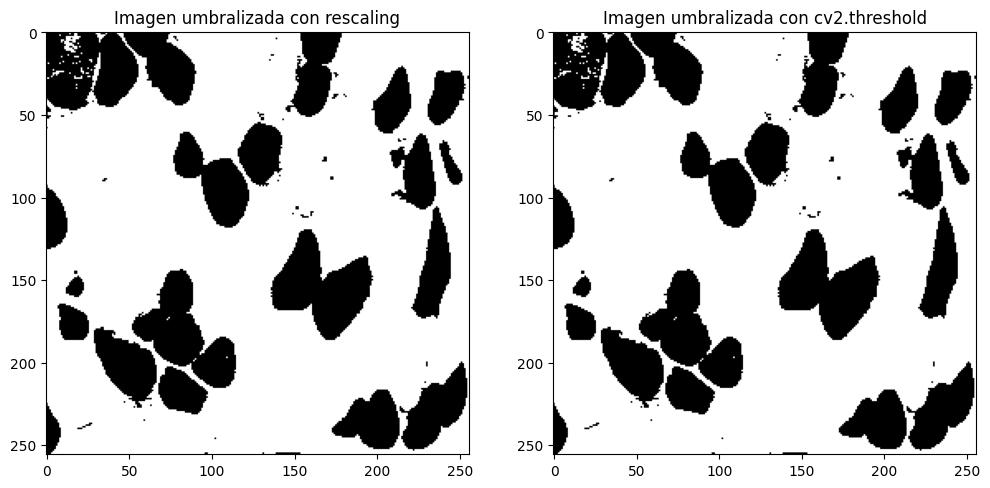

In [19]:
S = 80
_, imagen_umbral_threshold = cv2.threshold(imagen, S, 255, cv2.THRESH_BINARY)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(reescalar_umbralizacion(imagen, S).astype('uint8'), cmap='gray')
axs[0].set_title('Imagen umbralizada con rescaling')
axs[1].imshow(imagen_umbral_threshold, cmap='gray')
axs[1].set_title('Imagen umbralizada con cv2.threshold')
plt.show()

Tanto reescalar la imagen entre $S$ y $S+1$ como usar la librería `cv2` con su método `threshold` logran el mismo resultado.

## ¿Qué resultado dan los métodos de umbralización automática (Otsu) basados sobre la varianza? ¿Cómo eligen estos métodos el umbral a aplicar? Visualice las imágenes resultado y sus histogramas.

Otsu se aplica directamente con `cv2.threshold` agregando la flag `cv2.THRESH_OTSU`.

Umbral de Otsu: 125.0


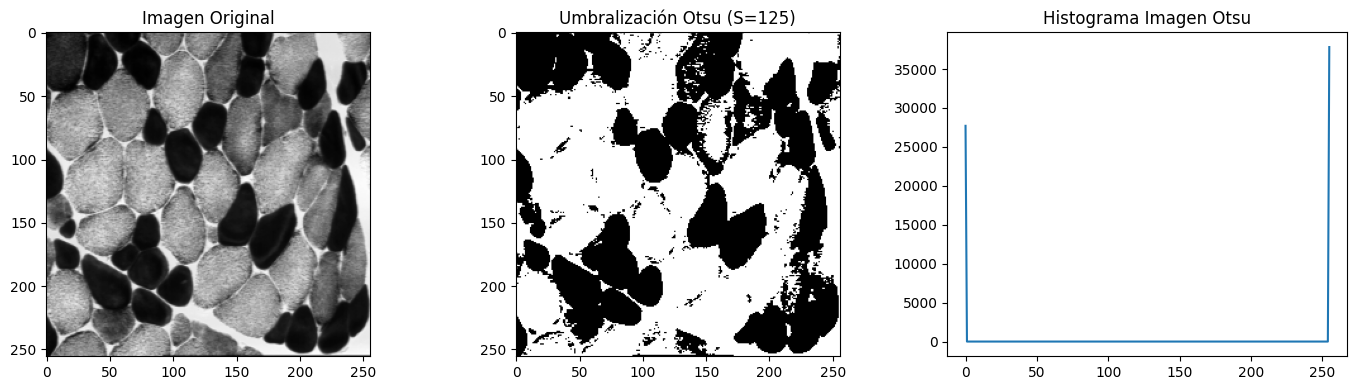

In [ ]:
import numpy as np

otsu_threshold, imagen_otsu = cv2.threshold(imagen, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(f'Umbral de Otsu: {otsu_threshold}')

hist_otsu = cv2.calcHist([imagen_otsu], [0], None, [256], [0, 256])

fig, axs = plt.subplots(1, 3, figsize=(14, 4))
axs[0].imshow(imagen, cmap='gray')
axs[0].set_title('Imagen Original')
axs[1].imshow(imagen_otsu, cmap='gray')
axs[1].set_title(f'Umbralización Otsu (S={int(otsu_threshold)})')
axs[2].plot(hist_otsu)
axs[2].set_title('Histograma Imagen Otsu')
plt.tight_layout()
plt.show()

La siguiente definición es generada por Claude Opus 4.6:
> Otsu prueba todos los umbrales posibles (0 a 255) y para cada uno calcula la varianza entre clases (inter-class variance). Divide los píxeles en dos grupos (los que están por debajo y por encima del umbral) y busca el valor que maximiza la separación entre esos dos grupos. Matemáticamente:
> $$\sigma^2_B(S) = \omega_0(S) \cdot \omega_1(S) \cdot [\mu_0(S) - \mu_1(S)]^2$$
> Donde:
> - $\omega_0, \omega_1$: proporciones de píxeles en cada clase.
> - $\mu_0, \mu_1$: medias de cada clase.
> - $S$: umbral.

En la imagen podemos ver que se resaltan regiones oscuras que no veíamos antes y bordes de fibras claras. El histograma muestra la misma distribución binaria, pero con un mayor balance entre la cuenta de 0 y la cuenta de 255.